In [1]:
import sys
import time
import os.path
from glob import glob
from datetime import datetime, timedelta

import h5py
import numpy as np

sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/utils/')

import data_utils as du
import graph_utils as gu

from namelist import * 

In [2]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [3]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

# Data

In [4]:
# importing domain information
with h5py.File(save_dir+'BC_domain_info.hdf', 'r') as h5io:
    base_lon = h5io['base_lon'][...]
    base_lat = h5io['base_lat'][...]
    bc_lon = h5io['bc_lon'][...]
    bc_lat = h5io['bc_lat'][...]
    etopo_bc = h5io['etopo_bc'][...]
    land_mask = h5io['land_mask_base'][...]
    land_mask_bc = h5io['land_mask_bc'][...]

## Datetime info

In [5]:
mon_rain = np.array([9, 10, 11, 0, 1, 2])
mon_dry = np.array([3, 4, 5, 6, 7, 8])

base = datetime(2017, 1, 1)
date_list = [base + timedelta(days=x) for x in range(365+365+365)]

rain_inds = np.zeros((len(date_list),), dtype=bool)
dry_inds = np.zeros((len(date_list),), dtype=bool)

mon_inds = []
for d, date in enumerate(date_list):
    
    mon_inds.append(date.month-1)
    if date.month-1 in mon_dry:
        dry_inds[d] = True
    else:
        rain_inds[d] = True
        
mon_inds = np.array(mon_inds)

#fcst_leads = np.arange(9, 72*3+3, 3, dtype=np.float)
fcst_leads = np.arange(3, 72*3+3, 3, dtype=np.float)

# date_base = datetime(2019, 1, 1, 0)
# UTC_H = []
# DAYS = []
# for lead in fcst_leads:
#     date_temp = date_base + timedelta(hours=lead)
#     UTC_H.append(date_temp.hour)
#     DAYS.append(date_temp.day-1)

## CRPS results

*Bad value found on: lead=3, day=39, year=2019, all grid points*
*(just a single day should be fine)*

In [6]:
# def CRPS_per_mon(H15_base_CRPS, mon_inds):
#     base_rain_mon = np.empty((12, 70))
#     for mon in range(12):
#         flag_pick = mon_inds == mon
#         base_rain_mon[mon, :] = np.nanmean(H15_base_CRPS[flag_pick, ...], axis=(0, 2, 3))
#     return base_rain_mon

In [7]:
# with h5py.File(save_dir+'BASE_final_CRPS_2017.hdf', 'r') as h5io:
#     BASE_CRPS_17 = h5io['CRPS'][...]
# with h5py.File(save_dir+'BASE_final_CRPS_2018.hdf', 'r') as h5io:
#     BASE_CRPS_18 = h5io['CRPS'][...]
# with h5py.File(save_dir+'BASE_final_CRPS_2019.hdf', 'r') as h5io:
#     BASE_CRPS_19 = h5io['CRPS'][...]

# with h5py.File(save_dir+'SL_final_CRPS_2017.hdf', 'r') as h5io:
#     SL_CRPS_17 = h5io['CRPS'][...]
# with h5py.File(save_dir+'SL_final_CRPS_2018.hdf', 'r') as h5io:
#     SL_CRPS_18 = h5io['CRPS'][...]
# with h5py.File(save_dir+'SL_final_CRPS_2019.hdf', 'r') as h5io:
#     SL_CRPS_19 = h5io['CRPS'][...]

# with h5py.File(save_dir+'BASE_CNN_CRPS_2017.hdf', 'r') as h5io:
#     BCNN_CRPS_17 = h5io['CRPS'][...]
# with h5py.File(save_dir+'BASE_CNN_CRPS_2018.hdf', 'r') as h5io:
#     BCNN_CRPS_18 = h5io['CRPS'][...]
# with h5py.File(save_dir+'BASE_CNN_CRPS_2019.hdf', 'r') as h5io:
#     BCNN_CRPS_19 = h5io['CRPS'][...]

# with h5py.File(save_dir+'SL_CNN_CRPS_2017.hdf', 'r') as h5io:
#     SCNN_CRPS_17 = h5io['CRPS'][...]
# with h5py.File(save_dir+'SL_CNN_CRPS_2018.hdf', 'r') as h5io:
#     SCNN_CRPS_18 = h5io['CRPS'][...]
# with h5py.File(save_dir+'SL_CNN_CRPS_2019.hdf', 'r') as h5io:
#     SCNN_CRPS_19 = h5io['CRPS'][...]
    
# with h5py.File(save_dir+'GEFS_CRPS_2017.hdf', 'r') as h5io:
#     GEFS_CRPS_17 = h5io['CRPS'][...]
# with h5py.File(save_dir+'GEFS_CRPS_2018.hdf', 'r') as h5io:
#     GEFS_CRPS_18 = h5io['CRPS'][...]
# with h5py.File(save_dir+'GEFS_CRPS_2019.hdf', 'r') as h5io:
#     GEFS_CRPS_19 = h5io['CRPS'][...]
    
# with h5py.File(save_dir+'CLIM_CRPS_2017.hdf', 'r') as h5io:
#     CLIM_CRPS_17 = h5io['CRPS'][...]
# with h5py.File(save_dir+'CLIM_CRPS_2018.hdf', 'r') as h5io:
#     CLIM_CRPS_18 = h5io['CRPS'][...]
# with h5py.File(save_dir+'CLIM_CRPS_2019.hdf', 'r') as h5io:
#     CLIM_CRPS_19 = h5io['CRPS'][...]
    
# CLIM_CRPS = np.concatenate((CLIM_CRPS_17, CLIM_CRPS_18, CLIM_CRPS_19), axis=0)
# GEFS_CRPS = np.concatenate((GEFS_CRPS_17, GEFS_CRPS_18, GEFS_CRPS_19), axis=0)
# BASE_CRPS = np.concatenate((BASE_CRPS_17, BASE_CRPS_18, BASE_CRPS_19), axis=0)
# SL_CRPS = np.concatenate((SL_CRPS_17, SL_CRPS_18, SL_CRPS_19), axis=0)
# BCNN_CRPS = np.concatenate((BCNN_CRPS_17, BCNN_CRPS_18, BCNN_CRPS_19), axis=0)
# SCNN_CRPS = np.concatenate((SCNN_CRPS_17, SCNN_CRPS_18, SCNN_CRPS_19), axis=0)

# l0 = 6; l1 = 14
# clim_rain_plot = np.nanmean(CLIM_CRPS[rain_inds, l0:l1, ...], axis=(0, 1))
# base_rain_plot = np.nanmean(BASE_CRPS[rain_inds, l0:l1, ...], axis=(0, 1))
# bcnn_rain_plot = np.nanmean(BCNN_CRPS[rain_inds, l0:l1, ...], axis=(0, 1))
# sl_rain_plot = np.nanmean(SL_CRPS[rain_inds, l0:l1, ...], axis=(0, 1))
# scnn_rain_plot = np.nanmean(SCNN_CRPS[rain_inds, l0:l1, ...], axis=(0, 1))

# clim_dry_plot = np.nanmean(CLIM_CRPS[dry_inds, l0:l1, ...], axis=(0, 1))
# base_dry_plot = np.nanmean(BASE_CRPS[dry_inds, l0:l1, ...], axis=(0, 1))
# bcnn_dry_plot = np.nanmean(BCNN_CRPS[dry_inds, l0:l1, ...], axis=(0, 1))
# sl_dry_plot = np.nanmean(SL_CRPS[dry_inds, l0:l1, ...], axis=(0, 1))
# scnn_dry_plot = np.nanmean(SCNN_CRPS[dry_inds, l0:l1, ...], axis=(0, 1))

# CRPS_GRID = {}
# CRPS_GRID['base_rain'] = 1-base_rain_plot/clim_rain_plot
# CRPS_GRID['sl_rain'] = 1-sl_rain_plot/clim_rain_plot
# CRPS_GRID['bcnn_rain'] = 1-bcnn_rain_plot/clim_rain_plot
# CRPS_GRID['scnn_rain'] = 1-scnn_rain_plot/clim_rain_plot
# CRPS_GRID['base_dry'] = 1-base_dry_plot/clim_dry_plot
# CRPS_GRID['sl_dry'] = 1-sl_dry_plot/clim_dry_plot
# CRPS_GRID['bcnn_dry'] = 1-bcnn_dry_plot/clim_dry_plot
# CRPS_GRID['scnn_dry'] = 1-scnn_dry_plot/clim_dry_plot

# from scipy.stats import wilcoxon

# def wilcoxon_by_grids(FCST1, FCST2, CLIM):
#     N_days, Nx, Ny = FCST1.shape
    
#     w_stat = np.empty((Nx, Ny)); w_stat[...] = np.nan
#     p_vals = np.empty((Nx, Ny)); p_vals[...] = np.nan
    
#     grids1 = 1-FCST1/CLIM
#     grids2 = 1-FCST2/CLIM
    
#     for i in range(Nx):
#         for j in range(Ny):
#             w_, p_ = wilcoxon(grids1[:, i, j], grids2[:, i, j], alternative='greater')
#             w_stat[i, j] = w_
#             p_vals[i, j] = p_
#     return w_stat, p_vals

# clim_rain_grids = np.nanmean(CLIM_CRPS[rain_inds, l0:l1, ...], axis=1)
# base_rain_grids = np.nanmean(BASE_CRPS[rain_inds, l0:l1, ...], axis=1)
# bcnn_rain_grids = np.nanmean(BCNN_CRPS[rain_inds, l0:l1, ...], axis=1)
# sl_rain_grids = np.nanmean(SL_CRPS[rain_inds, l0:l1, ...], axis=1)
# scnn_rain_grids = np.nanmean(SCNN_CRPS[rain_inds, l0:l1, ...], axis=1)

# clim_dry_grids = np.nanmean(CLIM_CRPS[dry_inds, l0:l1, ...], axis=1)
# base_dry_grids = np.nanmean(BASE_CRPS[dry_inds, l0:l1, ...], axis=1)
# bcnn_dry_grids = np.nanmean(BCNN_CRPS[dry_inds, l0:l1, ...], axis=1)
# sl_dry_grids = np.nanmean(SL_CRPS[dry_inds, l0:l1, ...], axis=1)
# scnn_dry_grids = np.nanmean(SCNN_CRPS[dry_inds, l0:l1, ...], axis=1)

# w_, p_ = wilcoxon_by_grids(bcnn_rain_grids, base_rain_grids, clim_rain_grids)
# CRPS_GRID['bcnn_base_rain_p'] = p_
# w_, p_ = wilcoxon_by_grids(scnn_rain_grids, sl_rain_grids, clim_rain_grids)
# CRPS_GRID['scnn_sl_rain_p'] = p_
# w_, p_ = wilcoxon_by_grids(sl_rain_grids, base_rain_grids, clim_rain_grids)
# CRPS_GRID['sl_base_rain_p'] = p_
# w_, p_ = wilcoxon_by_grids(scnn_rain_grids, bcnn_rain_grids, clim_rain_grids)
# CRPS_GRID['scnn_bcnn_rain_p'] = p_

# w_, p_ = wilcoxon_by_grids(bcnn_dry_grids, base_dry_grids, clim_dry_grids)
# CRPS_GRID['bcnn_base_dry_p'] = p_
# w_, p_ = wilcoxon_by_grids(scnn_dry_grids, sl_dry_grids, clim_dry_grids)
# CRPS_GRID['scnn_sl_dry_p'] = p_
# w_, p_ = wilcoxon_by_grids(sl_dry_grids, base_dry_grids, clim_dry_grids)
# CRPS_GRID['sl_base_dry_p'] = p_
# w_, p_ = wilcoxon_by_grids(scnn_dry_grids, bcnn_dry_grids, clim_dry_grids)
# CRPS_GRID['scnn_bcnn_dry_p'] = p_

# CLIM_CRPS_rain_ave = np.nanmean(CLIM_CRPS[rain_inds, ...], axis=(2, 3))
# BASE_CRPS_rain_ave = np.nanmean(BASE_CRPS[rain_inds, ...], axis=(2, 3))
# SL_CRPS_rain_ave = np.nanmean(SL_CRPS[rain_inds, ...], axis=(2, 3))
# BCNN_CRPS_rain_ave = np.nanmean(BCNN_CRPS[rain_inds, ...], axis=(2, 3))
# SCNN_CRPS_rain_ave = np.nanmean(SCNN_CRPS[rain_inds, ...], axis=(2, 3))

# CLIM_CRPS_dry_ave = np.nanmean(CLIM_CRPS[dry_inds, ...], axis=(2, 3))
# BASE_CRPS_dry_ave = np.nanmean(BASE_CRPS[dry_inds, ...], axis=(2, 3))
# SL_CRPS_dry_ave = np.nanmean(SL_CRPS[dry_inds, ...], axis=(2, 3))
# BCNN_CRPS_dry_ave = np.nanmean(BCNN_CRPS[dry_inds, ...], axis=(2, 3))
# SCNN_CRPS_dry_ave = np.nanmean(SCNN_CRPS[dry_inds, ...], axis=(2, 3))

# def wilcoxon_by_leads(FCST1, FCST2, CLIM):
#     N, L = FCST1.shape
#     w_stat = np.empty((L,))
#     p_vals = np.empty((L,))
    
#     series1 = 1-FCST1/CLIM
#     series2 = 1-FCST2/CLIM
    
#     for i in range(L):
#         w_, p_ = wilcoxon(series1[:, i], series2[:, i], alternative='greater')
#         w_stat[i] = w_
#         p_vals[i] = p_
#     return w_stat, p_vals

# pad_nan = np.array([np.nan, np.nan])

# CRPS_wilcox = {}
# w_stat, p_vals = wilcoxon_by_leads(SL_CRPS_rain_ave, BASE_CRPS_rain_ave, CLIM_CRPS_rain_ave)
# CRPS_wilcox['SL_BASE_rain'] = np.concatenate((pad_nan, p_vals), axis=0)
# w_stat, p_vals = wilcoxon_by_leads(SCNN_CRPS_rain_ave, BCNN_CRPS_rain_ave, CLIM_CRPS_rain_ave)
# CRPS_wilcox['SCNN_BCNN_rain'] = np.concatenate((pad_nan, p_vals), axis=0)
# w_stat, p_vals = wilcoxon_by_leads(SL_CRPS_dry_ave, BASE_CRPS_dry_ave, CLIM_CRPS_dry_ave)
# CRPS_wilcox['SL_BASE_dry'] = np.concatenate((pad_nan, p_vals), axis=0)
# w_stat, p_vals = wilcoxon_by_leads(SCNN_CRPS_dry_ave, BCNN_CRPS_dry_ave, CLIM_CRPS_dry_ave)
# CRPS_wilcox['SCNN_BCNN_dry'] = np.concatenate((pad_nan, p_vals), axis=0)

# CLIM_CRPS_rain = np.nanmean(CLIM_CRPS[rain_inds, :], axis=(0, 2, 3))
# GEFS_CRPS_rain = np.nanmean(GEFS_CRPS[rain_inds, :], axis=(0, 2, 3))
# BASE_CRPS_rain = np.nanmean(BASE_CRPS[rain_inds, :], axis=(0, 2, 3))
# SL_CRPS_rain = np.nanmean(SL_CRPS[rain_inds, :], axis=(0, 2, 3))
# BCNN_CRPS_rain = np.nanmean(BCNN_CRPS[rain_inds, :], axis=(0, 2, 3))
# SCNN_CRPS_rain = np.nanmean(SCNN_CRPS[rain_inds, :], axis=(0, 2, 3))

# CLIM_CRPS_dry = np.nanmean(CLIM_CRPS[dry_inds, :], axis=(0, 2, 3))
# GEFS_CRPS_dry = np.nanmean(GEFS_CRPS[dry_inds, :], axis=(0, 2, 3))
# BASE_CRPS_dry = np.nanmean(BASE_CRPS[dry_inds, :], axis=(0, 2, 3))
# SL_CRPS_dry = np.nanmean(SL_CRPS[dry_inds, :], axis=(0, 2, 3))
# BCNN_CRPS_dry = np.nanmean(BCNN_CRPS[dry_inds, :], axis=(0, 2, 3))
# SCNN_CRPS_dry = np.nanmean(SCNN_CRPS[dry_inds, :], axis=(0, 2, 3))

# CRPS_MEAN = {}
# CRPS_MEAN['clim_rain'] = np.concatenate((pad_nan, CLIM_CRPS_rain), axis=0)
# CRPS_MEAN['clim_dry'] = np.concatenate((pad_nan, CLIM_CRPS_dry), axis=0)

# CRPS_MEAN['gfs_rain'] = 1-np.concatenate((pad_nan, GEFS_CRPS_rain), axis=0)/CRPS_MEAN['clim_rain']
# CRPS_MEAN['base_rain'] = 1-np.concatenate((pad_nan, BASE_CRPS_rain), axis=0)/CRPS_MEAN['clim_rain']
# CRPS_MEAN['sl_rain'] = 1-np.concatenate((pad_nan, SL_CRPS_rain), axis=0)/CRPS_MEAN['clim_rain']
# CRPS_MEAN['bcnn_rain'] = 1-np.concatenate((pad_nan, BCNN_CRPS_rain), axis=0)/CRPS_MEAN['clim_rain']
# CRPS_MEAN['scnn_rain'] = 1-np.concatenate((pad_nan, SCNN_CRPS_rain), axis=0)/CRPS_MEAN['clim_rain']

# CRPS_MEAN['gfs_dry'] = 1-np.concatenate((pad_nan, GEFS_CRPS_dry), axis=0)/CRPS_MEAN['clim_dry']
# CRPS_MEAN['base_dry'] = 1-np.concatenate((pad_nan, BASE_CRPS_dry), axis=0)/CRPS_MEAN['clim_dry']
# CRPS_MEAN['sl_dry'] = 1-np.concatenate((pad_nan, SL_CRPS_dry), axis=0)/CRPS_MEAN['clim_dry']
# CRPS_MEAN['bcnn_dry'] = 1-np.concatenate((pad_nan, BCNN_CRPS_dry), axis=0)/CRPS_MEAN['clim_dry']
# CRPS_MEAN['scnn_dry'] = 1-np.concatenate((pad_nan, SCNN_CRPS_dry), axis=0)/CRPS_MEAN['clim_dry']

# np.save(save_dir+'CRPS_GRID.npy', CRPS_GRID)
# np.save(save_dir+'CRPS_wilcox.npy', CRPS_wilcox)
# np.save(save_dir+'CRPS_rain_dry.npy', CRPS_MEAN)

In [8]:
CRPS_wilcox = np.load(save_dir+'CRPS_wilcox.npy', allow_pickle=True)[()]
CRPS_MEAN = np.load(save_dir+'CRPS_rain_dry.npy', allow_pickle=True)[()]
CRPS_GRID = np.load(save_dir+'CRPS_GRID.npy', allow_pickle=True)[()]

### MAE (replaced by CRPS)

In [9]:
# with h5py.File(save_dir+'BASE_final_CRPS_2017.hdf', 'r') as h5io:
#     BASE_MAE_17 = h5io['MAE'][...]
# with h5py.File(save_dir+'BASE_final_CRPS_2018.hdf', 'r') as h5io:
#     BASE_MAE_18 = h5io['MAE'][...]
# with h5py.File(save_dir+'BASE_final_CRPS_2019.hdf', 'r') as h5io:
#     BASE_MAE_19 = h5io['MAE'][...]

# with h5py.File(save_dir+'SL_final_CRPS_2017.hdf', 'r') as h5io:
#     SL_MAE_17 = h5io['MAE'][...]
# with h5py.File(save_dir+'SL_final_CRPS_2018.hdf', 'r') as h5io:
#     SL_MAE_18 = h5io['MAE'][...]
# with h5py.File(save_dir+'SL_final_CRPS_2019.hdf', 'r') as h5io:
#     SL_MAE_19 = h5io['MAE'][...]

# with h5py.File(save_dir+'BASE_CNN_CRPS_2017.hdf', 'r') as h5io:
#     BCNN_MAE_17 = h5io['MAE'][...]
# with h5py.File(save_dir+'BASE_CNN_CRPS_2018.hdf', 'r') as h5io:
#     BCNN_MAE_18 = h5io['MAE'][...]
# with h5py.File(save_dir+'BASE_CNN_CRPS_2019.hdf', 'r') as h5io:
#     BCNN_MAE_19 = h5io['MAE'][...]

# with h5py.File(save_dir+'SL_CNN_CRPS_2017.hdf', 'r') as h5io:
#     SCNN_MAE_17 = h5io['MAE'][...]
# with h5py.File(save_dir+'SL_CNN_CRPS_2018.hdf', 'r') as h5io:
#     SCNN_MAE_18 = h5io['MAE'][...]
# with h5py.File(save_dir+'SL_CNN_CRPS_2019.hdf', 'r') as h5io:
#     SCNN_MAE_19 = h5io['MAE'][...]
    
# with h5py.File(save_dir+'GEFS_CRPS_2017.hdf', 'r') as h5io:
#     GEFS_MAE_17 = h5io['MAE'][...]
# with h5py.File(save_dir+'GEFS_CRPS_2018.hdf', 'r') as h5io:
#     GEFS_MAE_18 = h5io['MAE'][...]
# with h5py.File(save_dir+'GEFS_CRPS_2019.hdf', 'r') as h5io:
#     GEFS_MAE_19 = h5io['MAE'][...]
    
# with h5py.File(save_dir+'GEFS_RAW_CRPS_2017.hdf', 'r') as h5io:
#     GEFS_RAW_MAE_17 = h5io['MAE'][...]
# with h5py.File(save_dir+'GEFS_RAW_CRPS_2018.hdf', 'r') as h5io:
#     GEFS_RAW_MAE_18 = h5io['MAE'][...]
# with h5py.File(save_dir+'GEFS_RAW_CRPS_2019.hdf', 'r') as h5io:
#     GEFS_RAW_MAE_19 = h5io['MAE'][...]
# GEFS_RAW_MAE = np.concatenate((GEFS_RAW_MAE_17, GEFS_RAW_MAE_18, GEFS_RAW_MAE_19), axis=0)
# GEFS_MAE = np.concatenate((GEFS_MAE_17, GEFS_MAE_18, GEFS_MAE_19), axis=0)
# BASE_MAE = np.concatenate((BASE_MAE_17, BASE_MAE_18, BASE_MAE_19), axis=0)
# SL_MAE = np.concatenate((SL_MAE_17, SL_MAE_18, SL_MAE_19), axis=0)
# BCNN_MAE = np.concatenate((BCNN_MAE_17, BCNN_MAE_18, BCNN_MAE_19), axis=0)
# SCNN_MAE = np.concatenate((SCNN_MAE_17, SCNN_MAE_18, SCNN_MAE_19), axis=0)
# GEFS_RAW_MAE_rain = np.nanmean(GEFS_RAW_MAE[rain_inds, :], axis=(0, 2, 3))
# GEFS_MAE_rain = np.nanmean(GEFS_MAE[rain_inds, :], axis=(0, 2, 3))
# BASE_MAE_rain = np.nanmean(BASE_MAE[rain_inds, :], axis=(0, 2, 3))
# SL_MAE_rain = np.nanmean(SL_MAE[rain_inds, :], axis=(0, 2, 3))
# BCNN_MAE_rain = np.nanmean(BCNN_MAE[rain_inds, :], axis=(0, 2, 3))
# SCNN_MAE_rain = np.nanmean(SCNN_MAE[rain_inds, :], axis=(0, 2, 3))

# GEFS_RAW_MAE_dry = np.nanmean(GEFS_RAW_MAE[dry_inds, :], axis=(0, 2, 3))
# GEFS_MAE_dry = np.nanmean(GEFS_MAE[dry_inds, :], axis=(0, 2, 3))
# BASE_MAE_dry = np.nanmean(BASE_MAE[dry_inds, :], axis=(0, 2, 3))
# SL_MAE_dry = np.nanmean(SL_MAE[dry_inds, :], axis=(0, 2, 3))
# BCNN_MAE_dry = np.nanmean(BCNN_MAE[dry_inds, :], axis=(0, 2, 3))
# SCNN_MAE_dry = np.nanmean(SCNN_MAE[dry_inds, :], axis=(0, 2, 3))

# pad_nan = np.array([np.nan, np.nan])

# MAE_MEAN = {}
# MAE_MEAN['gfs_rain'] = np.concatenate((pad_nan, GEFS_MAE_rain), axis=0)
# MAE_MEAN['gfs_raw_rain'] = np.concatenate((pad_nan, GEFS_RAW_MAE_rain), axis=0)
# MAE_MEAN['base_rain'] = np.concatenate((pad_nan, BASE_MAE_rain), axis=0)
# MAE_MEAN['sl_rain'] = np.concatenate((pad_nan, SL_MAE_rain), axis=0)
# MAE_MEAN['bcnn_rain'] = np.concatenate((pad_nan, BCNN_MAE_rain), axis=0)
# MAE_MEAN['scnn_rain'] = np.concatenate((pad_nan, SCNN_MAE_rain), axis=0)

# MAE_MEAN['gfs_dry'] = np.concatenate((pad_nan, GEFS_MAE_dry), axis=0)
# MAE_MEAN['gfs_raw_dry'] = np.concatenate((pad_nan, GEFS_RAW_MAE_dry), axis=0)
# MAE_MEAN['base_dry'] = np.concatenate((pad_nan, BASE_MAE_dry), axis=0)
# MAE_MEAN['sl_dry'] = np.concatenate((pad_nan, SL_MAE_dry), axis=0)
# MAE_MEAN['bcnn_dry'] = np.concatenate((pad_nan, BCNN_MAE_dry), axis=0)
# MAE_MEAN['scnn_dry'] = np.concatenate((pad_nan, SCNN_MAE_dry), axis=0)

# np.save(save_dir+'MAE_rain_dry.npy', MAE_MEAN)
# MAE_MEAN = np.load(save_dir+'MAE_rain_dry.npy', allow_pickle=True)[()]

# Figure

In [10]:
edge_bc = [-141, -113.25, 48.25, 60]

def aspc_cal(edge):
    return (edge[3]-edge[2])/(edge[1]-edge[0])

r_bc = aspc_cal(edge_bc)

In [11]:
cmap_pct, A = gu.precip_cmap()

In [12]:
gray = [0.75, 0.75, 0.75]

KW = {}
KW['base'] = {'linestyle': '-', 'color': orange, 'linewidth':2.5}
KW['bcnn'] = {'linestyle': '--', 'color': red, 'linewidth':2.5}
KW['sl'] = {'linestyle': '-', 'color': cyan, 'linewidth':2.5}
KW['scnn'] = {'linestyle': '--', 'color': blue, 'linewidth':2.5}
KW['gfs'] = {'linestyle': '-', 'color': gray, 'linewidth':2.5}
KW['gfs_raw'] = {'linestyle': ':', 'color': gray, 'linewidth':1.5}

kw_bar = {'bottom':0.0, 'width': 3.0, 'color': gray, 'edgecolor': 'k', 'linestyle': '-', 'linewidth': 0}
kw_step = {'color': 'k', 'linestyle': '-', 'linewidth': 1.5, 'where':'mid'}

In [13]:
fontsize = 13

## Line graph

/glade/work/ksha/py_env_20200417/lib/python3.6/site-packages/ipykernel_launcher.py:165: RuntimeWarning: invalid value encountered in greater
/glade/work/ksha/py_env_20200417/lib/python3.6/site-packages/ipykernel_launcher.py:171: RuntimeWarning: invalid value encountered in greater
/glade/work/ksha/py_env_20200417/lib/python3.6/site-packages/ipykernel_launcher.py:165: RuntimeWarning: invalid value encountered in greater
/glade/work/ksha/py_env_20200417/lib/python3.6/site-packages/ipykernel_launcher.py:171: RuntimeWarning: invalid value encountered in greater


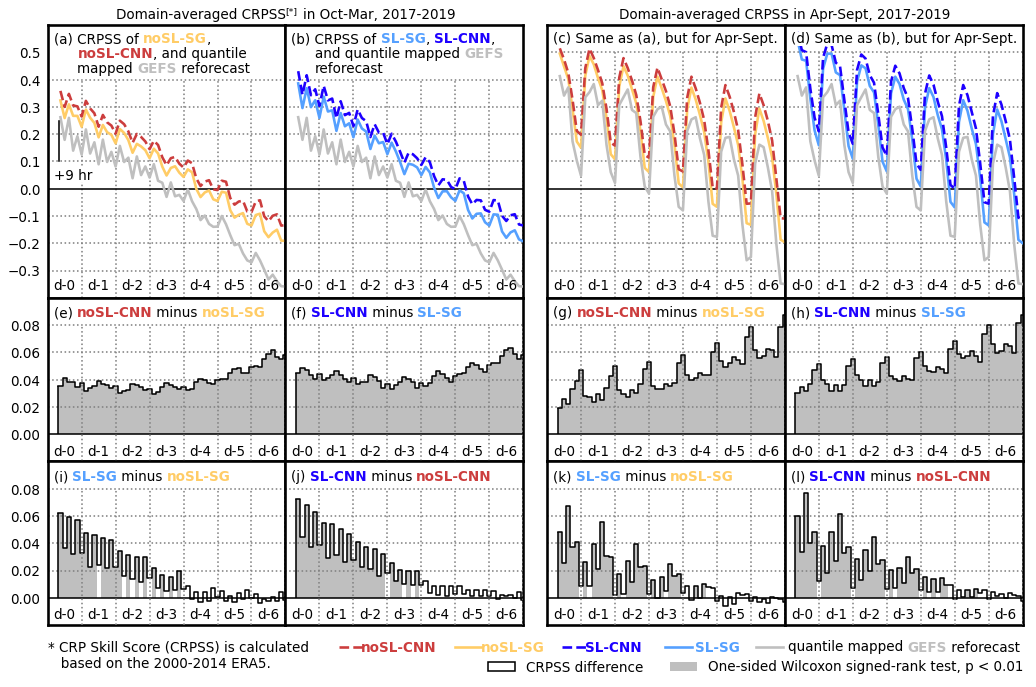

In [14]:
cates = ['rain', 'dry']
method_crps = ['base', 'bcnn', 'sl', 'scnn', 'gfs']
method_mae = ['base', 'bcnn', 'sl', 'scnn', 'gfs', 'gfs_raw']


fig = plt.figure(figsize=(13, 8), dpi=dpi_)
gs = gridspec.GridSpec(3, 5, height_ratios=[1, 0.6, 0.6], width_ratios=[1, 1, 0.1, 1, 1])

ax11 = plt.subplot(gs[0, 0])
ax12 = plt.subplot(gs[0, 1])
ax13 = plt.subplot(gs[1, 0])
ax14 = plt.subplot(gs[1, 1])
ax15 = plt.subplot(gs[2, 0])
ax16 = plt.subplot(gs[2, 1])

ax21 = plt.subplot(gs[0, 3])
ax22 = plt.subplot(gs[0, 4])
ax23 = plt.subplot(gs[1, 3])
ax24 = plt.subplot(gs[1, 4])
ax25 = plt.subplot(gs[2, 3])
ax26 = plt.subplot(gs[2, 4])

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

AX_all = [ax11, ax12, ax13, ax14, ax15, ax16, ax21, ax22, ax23, ax24, ax25, ax26]
AX_crps = [ax11, ax12, ax21, ax22]
AX_diff_all = [ax13, ax14, ax15, ax16, ax23, ax24, ax25, ax26]
AX_diff_sub1 = [ax13, ax23]
AX_diff_sub2 = [ax14, ax24]
AX_diff_sub3 = [ax15, ax25]
AX_diff_sub4 = [ax16, ax26]

x_start1, y_start1 = 0.025, 0.975
x_start2, y_start2 = 0.025, 0.95
x_start3, y_start3 = 0.025, 0.95

handles = []
ax_t1 = fig.add_axes([0, 1.0, (2/4.1), 0.03])
ax_t1.set_axis_off()
handles.append(ax_t1.text(0.5, 1, 'Domain-averaged CRPSS    in Oct-Mar, 2017-2019', ha='center', va='top', 
               fontsize=fontsize, transform=ax_t1.transAxes))
handles.append(ax_t1.text(0.5, 1, '[*]', ha='left', va='top', fontsize=9, transform=ax_t1.transAxes))

ax_t2 = fig.add_axes([2.1/4.1, 1.0, (2/4.1), 0.03])
ax_t2.set_axis_off()
handles.append(ax_t2.text(0.5, 1, 'Domain-averaged CRPSS in Apr-Sept, 2017-2019', ha='center', va='top', 
               fontsize=fontsize, transform=ax_t2.transAxes))

handles += gu.string_partial_format(fig, ax11, x_start1, y_start1, 'left', 'top', 
                                    ['(a) CRPSS of ', 'noSL-SG', ','], 
                                    ['k', orange, 'k'], [fontsize,]*3,  ['normal', 'bold', 'normal'])
handles += gu.string_partial_format(fig, ax11, x_start1+0.1, y_start1-0.055, 'left', 'top', 
                                    ['noSL-CNN', ', and quantile'], [red, 'k'], [fontsize,]*2,  ['bold', 'normal'])
handles += gu.string_partial_format(fig, ax11, x_start1+0.1, y_start1-0.11, 'left', 'top', 
                                    ['mapped ', 'GEFS', ' reforecast'], ['k', gray, 'k'], [fontsize,]*3,  ['normal', 'bold', 'normal'])

handles += gu.string_partial_format(fig, ax12, x_start1, y_start1, 'left', 'top', 
                                    ['(b) CRPSS of ', 'SL-SG', ', ', 'SL-CNN', ','], 
                                    ['k', cyan, 'k', blue, 'k'], [fontsize,]*5,  ['normal', 'bold', 'normal', 'bold', 'normal'])
handles += gu.string_partial_format(fig, ax12, x_start1+0.1, y_start1-0.055, 'left', 'top', 
                                    ['and quantile mapped ', 'GEFS'], ['k', gray], [fontsize,]*2,  ['normal', 'bold'])
handles += gu.string_partial_format(fig, ax12, x_start1+0.1, y_start1-0.11, 'left', 'top', 
                                    ['reforecast'], ['k',], [fontsize,],  ['normal',])

handles.append(ax21.text(x_start1, y_start1, '(c) Same as (a), but for Apr-Sept.', ha='left', va='top', 
                         fontsize=fontsize, transform=ax21.transAxes, zorder=6))

handles.append(ax22.text(x_start1, y_start1, '(d) Same as (b), but for Apr-Sept.', ha='left', va='top', 
                         fontsize=fontsize, transform=ax22.transAxes, zorder=6))

fontsize_list = [fontsize,]*5
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal']

handles += gu.string_partial_format(fig, ax13, x_start2, y_start2, 'left', 'top', 
                                    ['(e) ', 'noSL-CNN', ' minus ', 'noSL-SG'], 
                                    ['k', red, 'k', orange, 'k'], fontsize_list, fontweight_list)
handles += gu.string_partial_format(fig, ax14, x_start2, y_start2, 'left', 'top', 
                                    ['(f) ', 'SL-CNN', ' minus ', 'SL-SG'], 
                                    ['k', blue, 'k', cyan, 'k'], fontsize_list, fontweight_list)
handles += gu.string_partial_format(fig, ax23, x_start2, y_start2, 'left', 'top', 
                                    ['(g) ', 'noSL-CNN', ' minus ', 'noSL-SG'], 
                                    ['k', red, 'k', orange, 'k'], fontsize_list, fontweight_list)
handles += gu.string_partial_format(fig, ax24, x_start2, y_start2, 'left', 'top', 
                                    ['(h) ', 'SL-CNN', ' minus ', 'SL-SG'], 
                                    ['k', blue, 'k', cyan, 'k'], fontsize_list, fontweight_list)
handles += gu.string_partial_format(fig, ax15, x_start3, y_start3, 'left', 'top', 
                                    ['(i) ', 'SL-SG', ' minus ', 'noSL-SG'], 
                                    ['k', cyan, 'k', orange, 'k'], fontsize_list, fontweight_list)
handles += gu.string_partial_format(fig, ax16, x_start3, y_start3, 'left', 'top', 
                                    ['(j) ', 'SL-CNN', ' minus ', 'noSL-CNN'], 
                                    ['k', blue, 'k', red, 'k'], fontsize_list, fontweight_list)
handles += gu.string_partial_format(fig, ax25, x_start3, y_start3, 'left', 'top', 
                                    ['(k) ', 'SL-SG', ' minus ', 'noSL-SG'], 
                                    ['k', cyan, 'k', orange, 'k'], fontsize_list, fontweight_list)
handles += gu.string_partial_format(fig, ax26, x_start3, y_start3, 'left', 'top', 
                                    ['(l) ', 'SL-CNN', ' minus ', 'noSL-CNN'], 
                                    ['k', blue, 'k', red, 'k'], fontsize_list, fontweight_list)

for ax in AX_all:
    ax = gu.ax_decorate_box(ax)
    ax.xaxis.set_tick_params(labelsize=fontsize)
    ax.yaxis.set_tick_params(labelsize=fontsize)
    ax.set_xlim([0, 168])
    ax.set_xticks(np.arange(12, 168, 24))
    ax.axhline(0, xmin=0, xmax=1.0, linewidth=1.5, linestyle='-', color='k', zorder=3)
    
    for d in range(1, 8):
        ax.text(d/7.0-1/14, 0.02, 'd-{}'.format(int(d-1)), ha='center', va='bottom', 
                        fontsize=fontsize, transform=ax.transAxes, zorder=6)

for i, ax in enumerate(AX_crps):
    ax.set_ylim([-0.4, 0.6])
    ax.set_yticks([-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
    if i > 1:
        for y in np.arange(-0.3, 0.6, 0.1):
            if np.abs(y-0)>0.01:
                ax.axhline(y, xmin=0, xmax=1.0, linewidth=1.5, linestyle=':', color='0.5', zorder=2)
        for day in np.arange(24, 168+24, 24):
            ax.axvline(day, ymin=0, ymax=0.9, linewidth=1.5, linestyle=':', color='0.5', zorder=2)
    else:
        for y in np.arange(-0.3, 0.5, 0.1):
            if np.abs(y-0)>0.01:
                ax.axhline(y, xmin=0, xmax=1.0, linewidth=1.5, linestyle=':', color='0.5', zorder=2)
        for day in np.arange(24, 168+24, 24):
            ax.axvline(day, ymin=0, ymax=0.8, linewidth=1.5, linestyle=':', color='0.5', zorder=2)
            
for ax in AX_diff_sub1 + AX_diff_sub2 + AX_diff_sub3 + AX_diff_sub4:
    ax.set_ylim([-0.02, 0.1])
    ax.set_yticks([0.0, 0.02, 0.04, 0.06, 0.08,])
    for y in np.arange(0.02, 0.1, 0.02):
        ax.axhline(y, xmin=0, xmax=1.0, linewidth=1.5, linestyle=':', color='0.5')
    for day in np.arange(24, 168+24, 24):
        ax.axvline(day, ymin=0, ymax=5/6, linewidth=1.5, linestyle=':', color='0.5', zorder=5)
    
# for ax in [ax15, ax16, ax25, ax26]:
#     ax.tick_params(labelbottom=True)
#     ax.set_xticklabels(['d-0', 'd-1', 'd-2', 'd-3', 'd-4', 'd-5', 'd-6',])
    
ax11.tick_params(labelleft=True)
ax13.tick_params(labelleft=True)
ax15.tick_params(labelleft=True)

for i, key in enumerate(['base', 'bcnn', 'gfs']):
    AX_crps[0].plot(fcst_leads[:56], CRPS_MEAN['{}_rain'.format(key)], **KW[key], zorder=4)
    AX_crps[2].plot(fcst_leads[:56], CRPS_MEAN['{}_dry'.format(key)], **KW[key], zorder=4)
    
for i, key in enumerate(['sl', 'scnn', 'gfs']):
    AX_crps[1].plot(fcst_leads[:56], CRPS_MEAN['{}_rain'.format(key)], **KW[key], zorder=4)
    AX_crps[3].plot(fcst_leads[:56], CRPS_MEAN['{}_dry'.format(key)], **KW[key], zorder=4)
    
for i, key in enumerate(['rain', 'dry']):
    diff_ = CRPS_MEAN['bcnn_{}'.format(key)]-CRPS_MEAN['base_{}'.format(key)]
    AX_diff_sub1[i].bar(fcst_leads[:56], diff_, **kw_bar, zorder=2)
    AX_diff_sub1[i].step(fcst_leads[:56], diff_, **kw_step, zorder=4)
    AX_diff_sub1[i].vlines(fcst_leads[2]-1.5, ymin=0.0, ymax=diff_[2], color='k', linestyle='-', linewidth=1.5, zorder=5)
    
    diff_ = CRPS_MEAN['scnn_{}'.format(key)]-CRPS_MEAN['sl_{}'.format(key)]
    AX_diff_sub2[i].bar(fcst_leads[:56], diff_, **kw_bar, zorder=2)
    AX_diff_sub2[i].step(fcst_leads[:56], diff_, **kw_step, zorder=4)
    AX_diff_sub2[i].vlines(fcst_leads[2]-1.5, ymin=0.0, ymax=diff_[2], color='k', linestyle='-', linewidth=1.5, zorder=5)
    
    diff_ = np.copy(CRPS_MEAN['sl_{}'.format(key)]-CRPS_MEAN['base_{}'.format(key)])
    AX_diff_sub3[i].step(fcst_leads[:56], diff_, **kw_step, zorder=4)
    AX_diff_sub3[i].vlines(fcst_leads[2]-1.5, ymin=0.0, ymax=diff_[2], color='k', linestyle='-', linewidth=1.5, zorder=5)
    diff_[CRPS_wilcox['SL_BASE_{}'.format(key)] > 0.01] = np.nan
    AX_diff_sub3[i].bar(fcst_leads[:56], diff_, **kw_bar, zorder=2)
    
    diff_ = np.copy(CRPS_MEAN['scnn_{}'.format(key)]-CRPS_MEAN['bcnn_{}'.format(key)])
    AX_diff_sub4[i].step(fcst_leads[:56], diff_, **kw_step, zorder=4)
    AX_diff_sub4[i].vlines(fcst_leads[2]-1.5, ymin=0.0, ymax=diff_[2], color='k', linestyle='-', linewidth=1.5, zorder=5)
    diff_[CRPS_wilcox['SCNN_BCNN_{}'.format(key)] > 0.01] = np.nan
    AX_diff_sub4[i].bar(fcst_leads[:56], diff_, **kw_bar, zorder=2)
    
ax11.axvline(fcst_leads[2]-0.75, ymin=0.5, ymax=0.65, color='k', linestyle='-', linewidth=1.5, zorder=5)
handles.append(ax11.text(0.025, 0.475, '+9 hr', ha='left', va='top', fontsize=fontsize, transform=ax11.transAxes))

for handle in handles:
    handle.set_bbox(dict(facecolor='w', pad=0, edgecolor='none', zorder=6))
    
ax_w = fig.add_axes([0.0, -0.075, 0.275, 0.05])
ax_w.set_axis_off()
ax_w.text(0, 1, '* CRP Skill Score (CRPSS) is calculated\n   based on the 2000-2014 ERA5.', 
          ha='left', va='top', fontsize=fontsize, transform=ax_w.transAxes);

label_ = ['            ',
          '          ',
          '         ',
          '      ',
          '                                                   ']

handle_lines = []
handle_lines.append(mlines.Line2D([], [], label=label_[0], **KW['bcnn']))
handle_lines.append(mlines.Line2D([], [], label=label_[1], **KW['base']))
handle_lines.append(mlines.Line2D([], [], label=label_[2], **KW['scnn']))
handle_lines.append(mlines.Line2D([], [], label=label_[3], **KW['sl']))
handle_lines.append(mlines.Line2D([], [], label=label_[4], **KW['gfs']))

ax_lg1 = fig.add_axes([1.2/4.1, -0.075, 2.9/4.1, 0.05])
ax_lg1.set_axis_off()
LG1 = ax_lg1.legend(handles=handle_lines, bbox_to_anchor=(1, 0.75), ncol=5, loc=7, prop={'size':fontsize}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

ax_lg1.text(0.04, 1, 'noSL-CNN', ha='left', va='top', fontsize=fontsize, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.04+0.175, 1, 'noSL-SG', ha='left', va='top', fontsize=fontsize, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.04+0.325, 1, 'SL-CNN', ha='left', va='top', fontsize=fontsize, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.04+0.485, 1, 'SL-SG', ha='left', va='top', fontsize=fontsize, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg1.transAxes)

gu.string_partial_format(fig, ax_lg1, 0.06+0.6, 1, 'left', 'top', ['quantile mapped ', 'GEFS', ' reforecast'], 
                         ['k', gray, 'k'], [fontsize,]*3,  ['normal', 'bold', 'normal']);

handle_legneds = []
handle_legneds.append(patches.Patch(facecolor='none', edgecolor='k', linewidth=1.5,
                                    label='CRPSS difference'))
handle_legneds.append(patches.Patch(facecolor=gray, edgecolor='none', 
                                    label='One-sided Wilcoxon signed-rank test, p < 0.01'))

ax_lg2 = fig.add_axes([1.8/4.1, -0.075-0.01, 2.3/4.1, 0.03])
ax_lg2.set_axis_off()
LG2 = ax_lg2.legend(handles=handle_legneds, bbox_to_anchor=(0.0, 0.5), ncol=2, loc=6, 
                    prop={'size':fontsize}, fancybox=False);
LG2.get_frame().set_facecolor('none')
LG2.get_frame().set_linewidth(0)
LG2.get_frame().set_alpha(1.0)

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'AnEn_ERA_CRPS.png', format='png', **fig_keys)

## Maps

In [15]:
def aspc_cal(edge):
    return (edge[3]-edge[2])/(edge[1]-edge[0])

edge_bc = [-141-2, -113.25, 48.25, 60]
r_bc = aspc_cal(edge_bc)

In [16]:
# Cartopy map settings
scale_param = '50m' # 10m for publication quality
# US states and CAN-US boundary
PROVINCE = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale=scale_param,
    facecolor='none')

In [17]:
cmap_diff = cmap_pct

In [18]:
plt.rcParams['hatch.color'] = 'k'

In [19]:
fontsize = 14

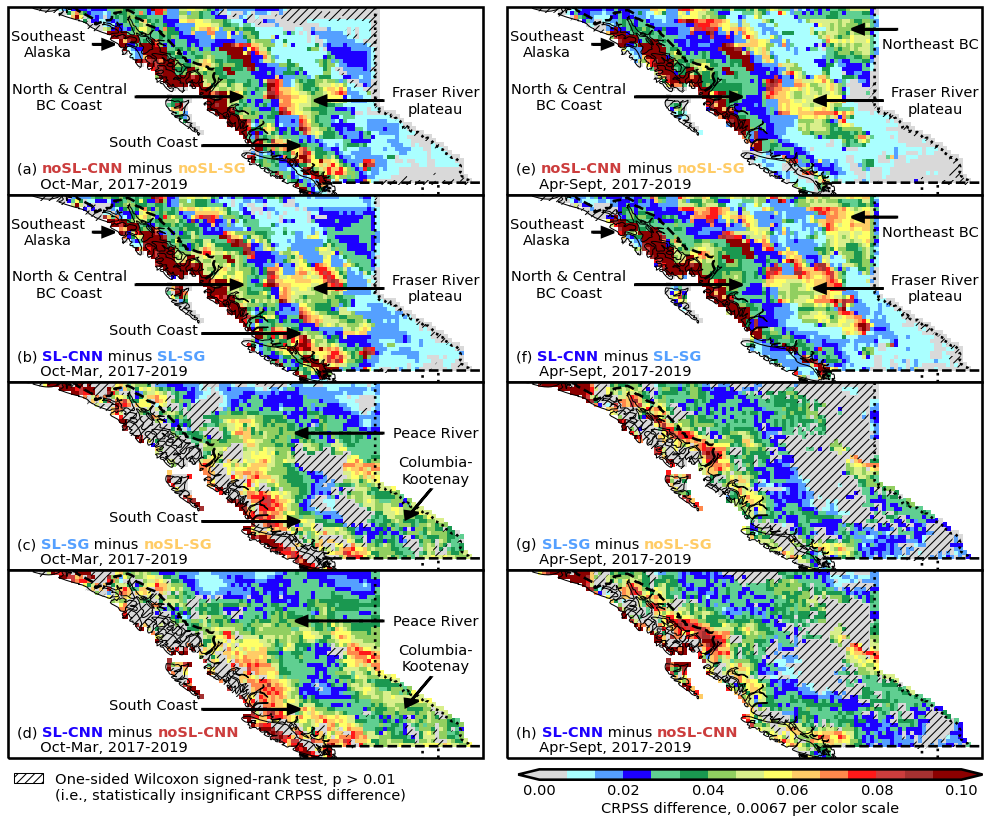

In [20]:

VLIM = [0.0, 0.1]

fig = plt.figure(figsize=(13, 4.0*(1/2.05)*13*r_bc), dpi=dpi_)

gs = gridspec.GridSpec(4, 3, height_ratios=[1, 1, 1, 1], width_ratios=[1, 0.05, 1])

ax1 = plt.subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax2 = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax3 = plt.subplot(gs[2, 0], projection=ccrs.PlateCarree())
ax4 = plt.subplot(gs[3, 0], projection=ccrs.PlateCarree())

ax5 = plt.subplot(gs[0, 2], projection=ccrs.PlateCarree())
ax6 = plt.subplot(gs[1, 2], projection=ccrs.PlateCarree())
ax7 = plt.subplot(gs[2, 2], projection=ccrs.PlateCarree())
ax8 = plt.subplot(gs[3, 2], projection=ccrs.PlateCarree())

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

AX_maps = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

handles = []
fontsize_list = [fontsize,]*5
fontweight_list = ['normal', 'bold', 'normal', 'bold', 'normal']
x_start2, y_start2 = 0.02, 0.175
x_start3, y_start3 = 0.02, 0.175

handles += gu.string_partial_format(fig, ax1, x_start2, y_start2, 'left', 'top', 
                                    ['(a) ', 'noSL-CNN', ' minus ', 'noSL-SG'], 
                                    ['k', red, 'k', orange, 'k'], fontsize_list, fontweight_list)
handles.append(ax1.text(x_start2, x_start2, '     Oct-Mar, 2017-2019', 
                        ha='left', va='bottom', fontsize=fontsize, transform=ax1.transAxes))

handles += gu.string_partial_format(fig, ax2, x_start2, y_start2, 'left', 'top', 
                                    ['(b) ', 'SL-CNN', ' minus ', 'SL-SG'], 
                                    ['k', blue, 'k', cyan, 'k'], fontsize_list, fontweight_list)
handles.append(ax2.text(x_start2, x_start2, '     Oct-Mar, 2017-2019', 
                        ha='left', va='bottom', fontsize=fontsize, transform=ax2.transAxes))

handles += gu.string_partial_format(fig, ax3, x_start3, y_start3, 'left', 'top', 
                                    ['(c) ', 'SL-SG', ' minus ', 'noSL-SG'], 
                                    ['k', cyan, 'k', orange, 'k'], fontsize_list, fontweight_list)
handles.append(ax3.text(x_start2, x_start2, '     Oct-Mar, 2017-2019', 
                        ha='left', va='bottom', fontsize=fontsize, transform=ax3.transAxes))

handles += gu.string_partial_format(fig, ax4, x_start3, y_start3, 'left', 'top', 
                                    ['(d) ', 'SL-CNN', ' minus ', 'noSL-CNN'], 
                                    ['k', blue, 'k', red, 'k'], fontsize_list, fontweight_list)
handles.append(ax4.text(x_start2, x_start2, '     Oct-Mar, 2017-2019', 
                        ha='left', va='bottom', fontsize=fontsize, transform=ax4.transAxes))

handles += gu.string_partial_format(fig, ax5, x_start2, y_start2, 'left', 'top', 
                                    ['(e) ', 'noSL-CNN', ' minus ', 'noSL-SG'], 
                                    ['k', red, 'k', orange, 'k'], fontsize_list, fontweight_list)
handles.append(ax5.text(x_start2, x_start2, '     Apr-Sept, 2017-2019', 
                        ha='left', va='bottom', fontsize=fontsize, transform=ax5.transAxes))

handles += gu.string_partial_format(fig, ax6, x_start2, y_start2, 'left', 'top', 
                                    ['(f) ', 'SL-CNN', ' minus ', 'SL-SG'], 
                                    ['k', blue, 'k', cyan, 'k'], fontsize_list, fontweight_list)
handles.append(ax6.text(x_start2, x_start2, '     Apr-Sept, 2017-2019', 
                        ha='left', va='bottom', fontsize=fontsize, transform=ax6.transAxes))

handles += gu.string_partial_format(fig, ax7, x_start3, y_start3, 'left', 'top', 
                                    ['(g) ', 'SL-SG', ' minus ', 'noSL-SG'], 
                                    ['k', cyan, 'k', orange, 'k'], fontsize_list, fontweight_list)
handles.append(ax7.text(x_start2, x_start2, '     Apr-Sept, 2017-2019', 
                        ha='left', va='bottom', fontsize=fontsize, transform=ax7.transAxes))

handles += gu.string_partial_format(fig, ax8, x_start3, y_start3, 'left', 'top', 
                                    ['(h) ', 'SL-CNN', ' minus ', 'noSL-CNN'], 
                                    ['k', blue, 'k', red, 'k'], fontsize_list, fontweight_list)
handles.append(ax8.text(x_start2, x_start2, '     Apr-Sept, 2017-2019', 
                        ha='left', va='bottom', fontsize=fontsize, transform=ax8.transAxes))

# ax_t1 = fig.add_axes([0, 1.0, (1/2.1), 0.045])
# ax_t1.set_axis_off()
# handles.append(ax_t1.text(0.5, 1, 'The CRPSS differences in day-1 forecasts', ha='center', va='top', 
#                fontsize=fontsize, transform=ax_t1.transAxes))

# ax_t2 = fig.add_axes([1.1/2.1, 1.0, (1/2.1), 0.045])
# ax_t2.set_axis_off()
# handles.append(ax_t2.text(0.5, 1, 'The CRPSS differences in day-1 forecasts', ha='center', va='top', 
#                fontsize=fontsize, transform=ax_t2.transAxes))


for n, ax in enumerate(AX_maps):
    ax.set_extent(edge_bc, ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale(scale_param), edgecolor='k', linewidth=1.0)
    ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='--', linewidth=2.5)
    ax.add_feature(PROVINCE, edgecolor='k', linestyle=':', linewidth=2.5)
    ax.spines['geo'].set_linewidth(2.5)

keys_p = ['bcnn_base_rain_p', 'scnn_sl_rain_p', 'sl_base_rain_p', 'scnn_bcnn_rain_p', 
          'bcnn_base_dry_p', 'scnn_sl_dry_p', 'sl_base_dry_p', 'scnn_bcnn_dry_p']
keys1 = ['bcnn_rain', 'scnn_rain', 'sl_rain', 'scnn_rain', 
         'bcnn_dry', 'scnn_dry', 'sl_dry', 'scnn_dry']
keys2 = ['base_rain', 'sl_rain', 'base_rain', 'bcnn_rain', 
         'base_dry', 'sl_dry', 'base_dry', 'bcnn_dry']

for i in range(8):
    diff_ = np.copy(CRPS_GRID[keys1[i]]-CRPS_GRID[keys2[i]])
    flag_ = np.copy(CRPS_GRID[keys_p[i]]>0.01)
    diff_[flag_] = 0.0; diff_[land_mask_bc] = np.nan
    flag_[land_mask_bc] = False
    CS = AX_maps[i].pcolormesh(bc_lon, bc_lat, diff_, vmin=VLIM[0], vmax=VLIM[1], cmap=cmap_diff)
    AX_maps[i].contourf(bc_lon, bc_lat, flag_, np.array([0.5, 1.5]), hatches=['///', 'none'], colors=('none',))

for ax in [ax1, ax2, ax5, ax6]:
    # Alaska
    ax.text(0.085, 0.8, 'Southeast\nAlaska', fontsize=14, ha='center', va='center', transform=ax.transAxes)
    ax.arrow(0.18, 0.8, 0.02, 0.0, head_width=0.05, head_length=0.025, 
             linewidth=2.5, fc='k', ec='k', transform=ax.transAxes)
    # N & C coast
    ax.text(0.13, 0.52, 'North & Central\nBC Coast', fontsize=14, ha='center', va='center', transform=ax.transAxes)
    ax.arrow(0.27, 0.52, 0.2, 0.0, head_width=0.05, head_length=0.025, 
             linewidth=2.5, fc='k', ec='k', transform=ax.transAxes)
    # Fraser
    ax.text(0.9, 0.5, 'Fraser River\nplateau', fontsize=14, ha='center', va='center', transform=ax.transAxes)
    ax.arrow(0.79, 0.5, -0.12, 0, head_width=0.05, head_length=0.025, 
             linewidth=2.5, fc='k', ec='k', transform=ax.transAxes)
    
for ax in [ax1, ax2, ax3, ax4]:
    # S-C
    ax.text(0.4, 0.28, 'South Coast', fontsize=14, ha='right', va='center', transform=ax.transAxes)
    ax.arrow(0.41, 0.26, 0.18, 0.0, head_width=0.05, head_length=0.025, 
             linewidth=2.5, fc='k', ec='k', transform=ax.transAxes)

for ax in [ax3, ax4]:
    # Peace
    ax.text(0.81, 0.73, 'Peace River', fontsize=14, ha='left', va='center', transform=ax.transAxes)
    ax.arrow(0.79, 0.73, -0.16, 0.0, head_width=0.05, head_length=0.025, 
             linewidth=2.5, fc='k', ec='k', transform=ax.transAxes)
    
for ax in [ax5, ax6]:
    # Northeast
    ax.text(0.89, 0.8, 'Northeast BC', fontsize=14, ha='center', va='center', transform=ax.transAxes)
    ax.arrow(0.82, 0.88, -0.07, 0, head_width=0.05, head_length=0.025, 
             linewidth=2.5, fc='k', ec='k', transform=ax.transAxes)
    
for ax in [ax3, ax4]:
    # C-K
    ax.text(0.9, 0.45, 'Columbia-\nKootenay', fontsize=14, ha='center', va='bottom', transform=ax.transAxes)
    ax.arrow(0.89, 0.43, -0.04, -0.12, head_width=0.03, head_length=0.04, 
             linewidth=2.5, fc='k', ec='k', transform=ax.transAxes)
    
handle_legneds = []
handle_legneds.append(patches.Patch(facecolor='none', edgecolor='k', hatch='///', 
                                    label='One-sided Wilcoxon signed-rank test, p > 0.01'))
    
ax_lg1 = fig.add_axes([0, -0.04, 1/2.1-0.065, 0.025])
ax_lg1.set_axis_off()
LG2 = ax_lg1.legend(handles=handle_legneds, bbox_to_anchor=(1.0, 0.5), ncol=1, loc=7, prop={'size':fontsize}, fancybox=False);
LG2.get_frame().set_facecolor('none')
LG2.get_frame().set_linewidth(0)
LG2.get_frame().set_alpha(1.0)

ax_lg2 = fig.add_axes([0, -0.065, 1/2.1-0.065, 0.025])
ax_lg2.set_axis_off()
handles.append(ax_lg2.text(0.1175, 1.0, '(i.e., statistically insignificant CRPSS difference)', ha='left', va='top', 
               fontsize=fontsize, transform=ax_lg2.transAxes))

ax_base = fig.add_axes([1.1/2.1, -0.065, 1.0/2.1, 0.05])
[j.set_linewidth(0) for j in ax_base.spines.values()]
ax_base.tick_params(axis='both', left=False, top=False, right=False, bottom=False, \
                    labelleft=False, labeltop=False, labelright=False, labelbottom=False)
cax = inset_axes(ax_base, height='27.5%', width='100%', borderpad=0, loc=2)
CBar = plt.colorbar(CS, orientation='horizontal', extend='both', ticks=[0.0, 0.02, 0.04, 0.06, 0.08, 0.10], cax=cax) #, , 
CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)
CBar.set_label('CRPSS difference, 0.0067 per color scale', fontsize=14)
CBar.outline.set_linewidth(2.5)

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'AnEn_ERA_CRPS_GRID.png', format='png', **fig_keys)

# Figure (old)

In [21]:
# edge_bc = [-141, -113.25, 48.25, 60]
# r_bc = aspc_cal(edge_bc)

# blue = A[3, :]; cyan = A[2, :]; green = A[7, :]; red = A[-3, :]; gray = [0.5, 0.5, 0.5]
# k = 'k'

# C = [cyan, blue, green]
# S = ['-', '--', '-']
# VLIM = [0.1, 0.4]

# fig = plt.figure(figsize=(13, (3.1/2)*13*(1/2)*r_bc*2))
# gs = gridspec.GridSpec(4, 20, height_ratios=[1, 0.1, 1, 1], width_ratios=[0.5]+[1]*18+[0.5])

# ax5 = plt.subplot(gs[0, 1:10])
# ax6 = plt.subplot(gs[0, 10:-1])
# ax1 = plt.subplot(gs[2, :10], projection=ccrs.PlateCarree())
# ax2 = plt.subplot(gs[2, 10:], projection=ccrs.PlateCarree())
# ax3 = plt.subplot(gs[3, :10], projection=ccrs.PlateCarree())
# ax4 = plt.subplot(gs[3, 10:], projection=ccrs.PlateCarree())
# plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

# AX_lines = [ax5, ax6]
# AX_maps = [ax1, ax2, ax3, ax4]

# handle_text = []
# title_lines = ['(a) CRPSS     comparisons\n     Averaged in Oct-Mar, 2017-2019',
#               '(b) Same as in (a), but for\n     Apr-Sept, 2017-2019']

# title_maps = ['(c) SL-SG, averaged from\n     day-1 fcst, Oct-Mar, 2017-2019',
#               '(d) Same as in (c),\n     but for Apr-Sept',
#               '(e) SL-CNN, averaged from\n     day-1 fcst, Oct-Mar, 2017-2019',
#               '(f) Same as in (e),\n     but for Apr-Sept']

# labels = ['noSL-SG', 'SL-SG', 'SL-CNN (ours)']
# for n, ax in enumerate(AX_maps):
#     ax.set_extent(edge_bc, ccrs.PlateCarree())
#     ax.add_feature(cfeature.COASTLINE.with_scale(scale_param), edgecolor='k', linewidth=1.5)
#     ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='--', linewidth=2.5)
#     ax.add_feature(PROVINCE, edgecolor='k', linestyle=':', linewidth=2.5)
#     ax.spines['geo'].set_linewidth(2.5)
#     ax.text(0.01, 0.025, title_maps[n], ha='left', va='bottom', fontsize=14, transform=ax.transAxes, zorder=5)

# xlocs = [0.4, 0.5]
# ylocs = [0.97, 0.97]

# for i, ax in enumerate(AX_lines):
#     ax = gu.ax_decorate(ax, left_flag=True, bottom_flag=True)
#     ax.grid(False)
#     ax.xaxis.set_tick_params(labelsize=14)
#     ax.yaxis.set_tick_params(labelsize=14)
#     [j.set_linewidth(2.5) for j in ax.spines.values()]
#     ax.tick_params(axis="both", which="both", 
#                    bottom=False, top=False, left=False, right=False, 
#                    labelbottom=False, labelleft=True)
    
#     # ------------------- #
#     # ticks and day-1 to day-7 labels
#     ax.set_ylim([0.025, 0.425])
#     ax.set_yticks([0.1, 0.2, 0.3, 0.4])
#     ax.set_xlim([0, 168])
#     for d in range(1, 8):
#         ax.text(d/7.0-1/14, 0, 'day-{}'.format(int(d-1)), ha='center', va='bottom', 
#                         fontsize=14, transform=ax.transAxes )
#     # ------------------- #
#     # titles
#     handle_text.append(ax.text(xlocs[i], ylocs[i], title_lines[i], ha='left', va='top', 
#                              fontsize=14, transform=ax.transAxes, zorder=2))
# # ------------------- #
# # grid lines by hand
# ax5.axhline(0.1, xmin=0, xmax=1.0, linewidth=1.5, linestyle=':', color='0.5')
# ax5.axhline(0.2, xmin=0, xmax=1.0, linewidth=1.5, linestyle=':', color='0.5') 
# ax5.axhline(0.3, xmin=0, xmax=3/7, linewidth=1.5, linestyle=':', color='0.5')
# ax5.axhline(0.4, xmin=0, xmax=3/7, linewidth=1.5, linestyle=':', color='0.5')

# ax6.axhline(0.1, xmin=0, xmax=1.0, linewidth=1.5, linestyle=':', color='0.5')
# ax6.axhline(0.2, xmin=0, xmax=1.0, linewidth=1.5, linestyle=':', color='0.5') 
# ax6.axhline(0.3, xmin=0, xmax=1.0, linewidth=1.5, linestyle=':', color='0.5')
# ax6.axhline(0.4, xmin=0, xmax=1.0, linewidth=1.5, linestyle=':', color='0.5')

# for day in np.arange(24, 168+24, 24):
#     if day == 72:
#         ax5.axvline(day, ymin=0, ymax=0.755, linewidth=1.5, linestyle=':', color='0.5')
#         ax6.axvline(day, ymin=0, ymax=1.0, linewidth=1.5, linestyle=':', color='0.5')     
#     elif day >= 96:
#         ax5.axvline(day, ymin=0, ymax=0.5, linewidth=1.5, linestyle=':', color='0.5')
#         ax6.axvline(day, ymin=0, ymax=1.0, linewidth=1.5, linestyle=':', color='0.5')     
#     else:
#         ax5.axvline(day, ymin=0, ymax=1.0, linewidth=1.5, linestyle=':', color='0.5')
#         ax6.axvline(day, ymin=0, ymax=1.0, linewidth=1.5, linestyle=':', color='0.5')
# # ------------------- #

# handle_sym = ax5.text(0.562, 1, '[*]', ha='left', va='top', fontsize=12, transform=ax5.transAxes, zorder=5)
# for handle in handle_text:
#     handle.set_bbox(dict(facecolor='w', edgecolor='none', zorder=2))
    
# ax6.spines["right"].set_visible(True)
# ax6.tick_params(labelleft=False)
# ax6.tick_params(axis="both", which="both", labelleft=False)

# CS = ax1.pcolormesh(bc_lon, bc_lat, 1-sl_rain_plot/gfs_rain_plot, vmin=VLIM[0], vmax=VLIM[1], cmap=cmap_pct)
# ax3.pcolormesh(bc_lon, bc_lat, 1-cnn_rain_plot/gfs_rain_plot, vmin=VLIM[0], vmax=VLIM[1], cmap=cmap_pct)
# ax2.pcolormesh(bc_lon, bc_lat, 1-sl_dry_plot/gfs_dry_plot, vmin=VLIM[0], vmax=VLIM[1], cmap=cmap_pct)
# ax4.pcolormesh(bc_lon, bc_lat, 1-cnn_dry_plot/gfs_dry_plot, vmin=VLIM[0], vmax=VLIM[1], cmap=cmap_pct)

# for ax in [ax2, ax4]:
#     ax.text(0.81, 0.7, 'Peace River', fontsize=14, ha='left', va='center', transform=ax.transAxes)
#     ax.arrow(0.8, 0.7, -0.18, 0.0, head_width=0.05, head_length=0.025, 
#              linewidth=2.5, fc='k', ec='k', transform=ax.transAxes)
#     ax.text(0.9, 0.45, 'Southern\nInterior', fontsize=14, ha='center', va='bottom', transform=ax.transAxes)
#     ax.arrow(0.83, 0.49, -0.04, -0.12, head_width=0.03, head_length=0.04, 
#              linewidth=2.5, fc='k', ec='k', transform=ax.transAxes)
    
# for ax in [ax1, ax3]:
#     ax.text(0.13, 0.53, 'North & Central\nBC Coast', fontsize=14, ha='center', va='center', transform=ax.transAxes)
#     ax.arrow(0.27, 0.53, 0.17, 0.0, head_width=0.05, head_length=0.025, 
#              linewidth=2.5, fc='k', ec='k', transform=ax.transAxes)
#     ax.text(0.4, 0.28, 'South Coast', fontsize=14, ha='right', va='center', transform=ax.transAxes)
#     ax.arrow(0.41, 0.26, 0.16, 0.0, head_width=0.05, head_length=0.025, 
#              linewidth=2.5, fc='k', ec='k', transform=ax.transAxes)
    
# LINES = []
# methods = ['base', 'sl', 'cnn']
# AX_cate = [ax5, ax6]
# for i, cate in enumerate(cates):
#     for j, method in enumerate(methods):
#         LINES += AX_cate[i].plot(fcst_leads[:56], 
#         (1-CRPS_MEAN['{}_{}'.format(method, cate)]/CRPS_MEAN['gfs_{}'.format(cate)])[:56],
#         color=C[j], linewidth=3.5, linestyle=S[j], label=labels[j], zorder=3)
        
# ax5.axvline(fcst_leads[2]-0.75, ymin=0.475, ymax=0.625, color='k', linestyle='-', linewidth=2.5)
# ax5.text(0.025, 0.425, '+9 hr', ha='left', va='top', fontsize=14, transform=ax5.transAxes)

# ax_lg1 = fig.add_axes([0.0225+0.22, 0.835+0.04, 0.175, 0.05])
# ax_lg1.set_axis_off()
# LG1 = ax_lg1.legend(handles=[LINES[2]], bbox_to_anchor=(1, 1), ncol=1, prop={'size':14}, fancybox=False);
# LG1.get_frame().set_facecolor('w')
# LG1.get_frame().set_linewidth(0)
# LG1.get_frame().set_alpha(1.0)

# ax_lg2 = fig.add_axes([0.02+0.22, 0.805+0.04, 0.25, 0.05])
# ax_lg2.set_axis_off()
# LG2 = ax_lg2.legend(handles=[LINES[1], LINES[0]], bbox_to_anchor=(1, 1), ncol=2, prop={'size':14}, fancybox=False);
# LG2.get_frame().set_facecolor('w')
# LG2.get_frame().set_linewidth(0)
# LG2.get_frame().set_alpha(1.0)

# ax_w = fig.add_axes([0.0, -0.06, 0.41, 0.05])
# ax_w.set_axis_off()
# ax_w.text(0, 1, 
#           '* CRP Skill Score (CRPSS) is calculated relative to\n   the quantile mapped and enlarged GEFS reforecast (75 members).', 
#           ha='left', va='top', fontsize=14, transform=ax_w.transAxes);

# ax_base = fig.add_axes([0.6, -0.065, 0.3-0.015, 0.05])
# [j.set_linewidth(0) for j in ax_base.spines.values()]
# ax_base.tick_params(axis='both', left=False, top=False, right=False, bottom=False, \
#                     labelleft=False, labeltop=False, labelright=False, labelbottom=False)
# cax = inset_axes(ax_base, height='27.5%', width='100%', borderpad=0, loc=2)
# CBar = plt.colorbar(CS, orientation='horizontal', ticks=[0.05, 0.15, 0.25, 0.35,], extend='min', cax=cax) #, 
# CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)
# CBar.set_label('CRPSS, 0.02 per color scale', fontsize=14)
# CBar.outline.set_linewidth(2.5)

# # # Save figure
# # fig.savefig(fig_dir+'AnEn_ERA_CRPS.png', format='png', **fig_keys)